In [34]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import cv2

In [35]:
import os
data = "/content/images"

In [36]:
BATCH_SIZE = 32
img_height = 150
img_width = 150

In [37]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split = 0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE
)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.


In [38]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE
)

Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [39]:
class_labels = train_ds.class_names
print(class_labels)

['benign', 'malignant', 'normal']


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
class_labels = label_encoder.fit_transform(class_labels)
diagnosis = label_encoder.classes_
changed_labels = to_categorical(class_labels)

for changed_labels, diagnosis in enumerate(diagnosis):
    print(f"Changed labels {changed_labels} from {diagnosis}")

Changed labels 0 from benign
Changed labels 1 from malignant
Changed labels 2 from normal


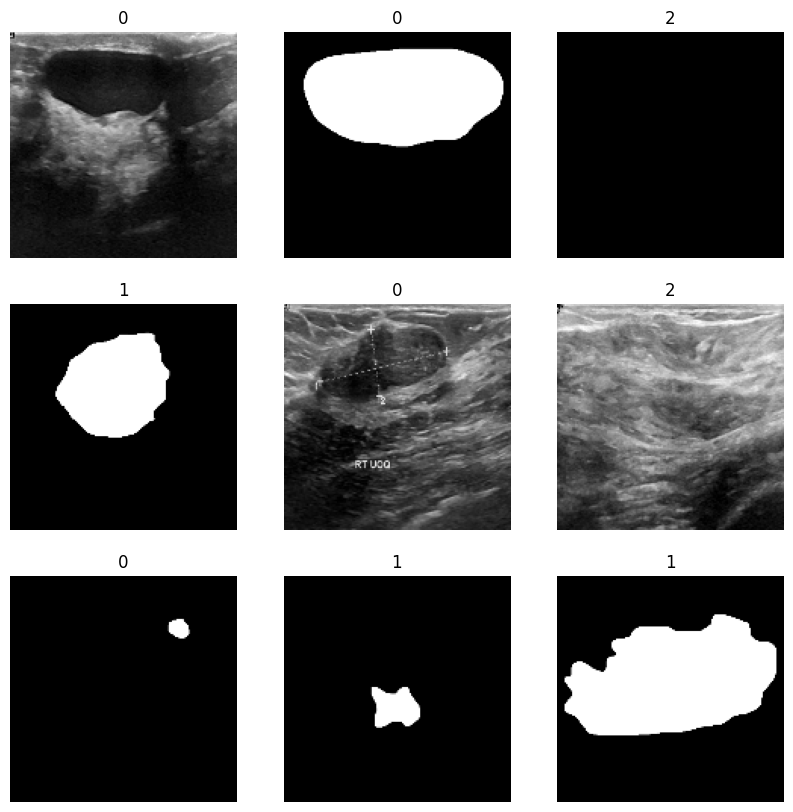

In [41]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_labels[labels[i]])
    plt.axis("off")

In [42]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [32]:
FEATURE_MAP = 32
NUM_CLASSES = 3

model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(FEATURE_MAP, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(2*FEATURE_MAP, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(4*FEATURE_MAP, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(8*FEATURE_MAP, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [33]:
model_1.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [43]:
model_1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 48s 1s/step - loss: 0.9373 - accuracy: 0.5139 - val_loss: 0.8290 - val_accuracy: 0.5714
Epoch 2/10
40/40 [==============================] - 47s 1s/step - loss: 0.7877 - accuracy: 0.6057 - val_loss: 0.7391 - val_accuracy: 0.7016
Epoch 3/10
40/40 [==============================] - 47s 1s/step - loss: 0.6974 - accuracy: 0.7007 - val_loss: 0.7629 - val_accuracy: 0.6095
Epoch 4/10
40/40 [==============================] - 45s 1s/step - loss: 0.5801 - accuracy: 0.7253 - val_loss: 0.8119 - val_accuracy: 0.7302
Epoch 5/10
40/40 [==============================] - 47s 1s/step - loss: 0.4755 - accuracy: 0.7878 - val_loss: 0.6047 - val_accuracy: 0.7841
Epoch 6/10
40/40 [==============================] - 47s 1s/step - loss: 0.3558 - accuracy: 0.8488 - val_loss: 0.6926 - val_accuracy: 0.7746
Epoch 7/10
40/40 [==============================] - 47s 1s/step - loss: 0.3020 - accuracy: 0.8757 - val_loss: 0.5573 - val_accuracy: 0.8063
Epoch 8/10
40/40 [=============